<a href="https://colab.research.google.com/github/daniel868142/2034_project/blob/main/2034.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Predicting quality of wine and analysing which physiochemical measures determine their quality**

Getting wine daa from gihub repositry

In [2]:
!git clone https://github.com/daniel868142/2034_project.git
import os
os.chdir('2034_project/Wine_data')

fatal: destination path '2034_project' already exists and is not an empty directory.


In [3]:
import pandas as pd


path = './winequality-red.csv'
wpath = './winequality-white.csv'

red_wine = pd.read_csv(path, sep=';', header = 0)
white_wine = pd.read_csv(wpath, sep=';', header = 0)

# Exploring the datasets

A. Plotting the distribution of wine quality, seperately for white and red.

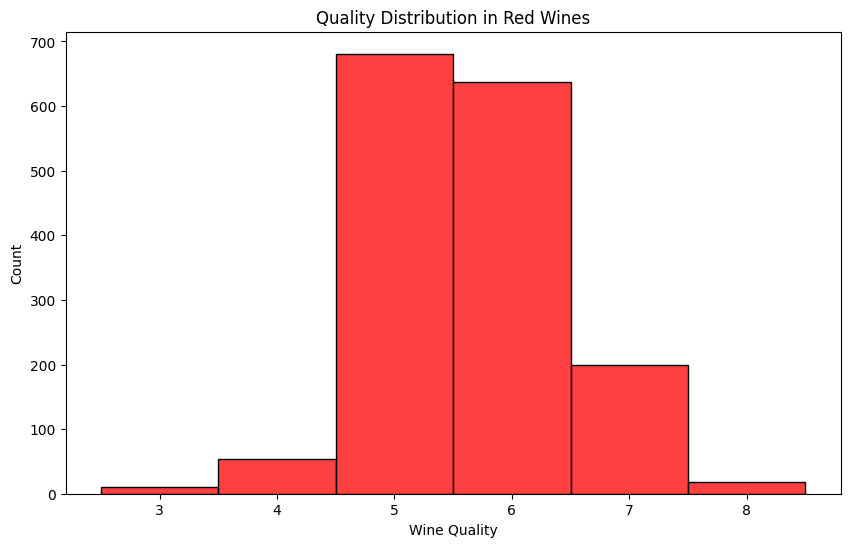

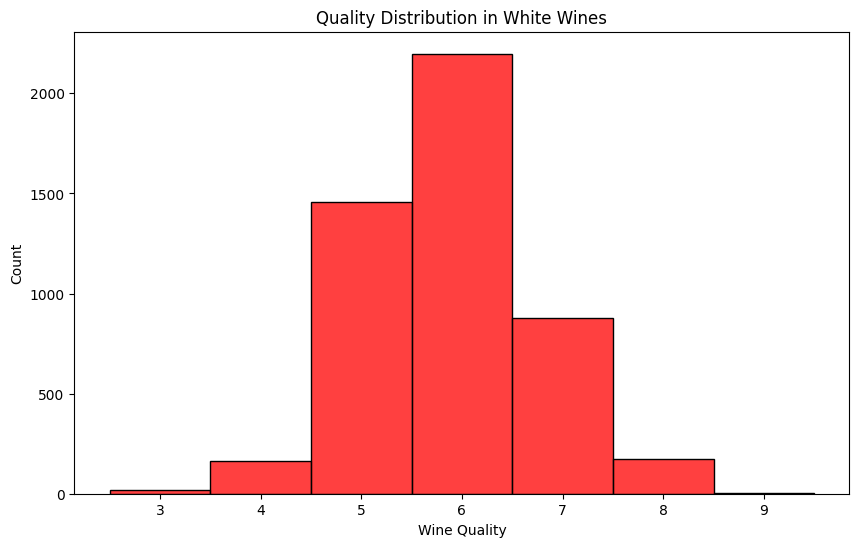

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
plt.title("Quality Distribution in Red Wines")
sns.histplot(red_wine["quality"], bins=10, color="red", discrete=True)
plt.xlabel("Wine Quality")
plt.ylabel("Count")
plt.show()

plt.figure(figsize=(10, 6))
plt.title("Quality Distribution in White Wines")
sns.histplot(white_wine["quality"], bins=10, color="red", discrete=True)
plt.xlabel("Wine Quality")
plt.ylabel("Count")
plt.show()

B. Discretising the alcholol content into low, medium and high variables

In [5]:
import numpy as np
def categorize_alcohol(df):
    mean_alcohol = df["alcohol"].mean()
    std_alcohol = df["alcohol"].std()
    low_threshold = mean_alcohol - std_alcohol
    high_threshold = mean_alcohol + std_alcohol

    df["alcohol_cat"] = np.where(df["alcohol"] < low_threshold, "low",
                         np.where(df["alcohol"] > high_threshold, "high", "mid"))

    return df
red_wine = categorize_alcohol(red_wine)
white_wine = categorize_alcohol(white_wine)

C. Plotting catgorised wine quality distribution.

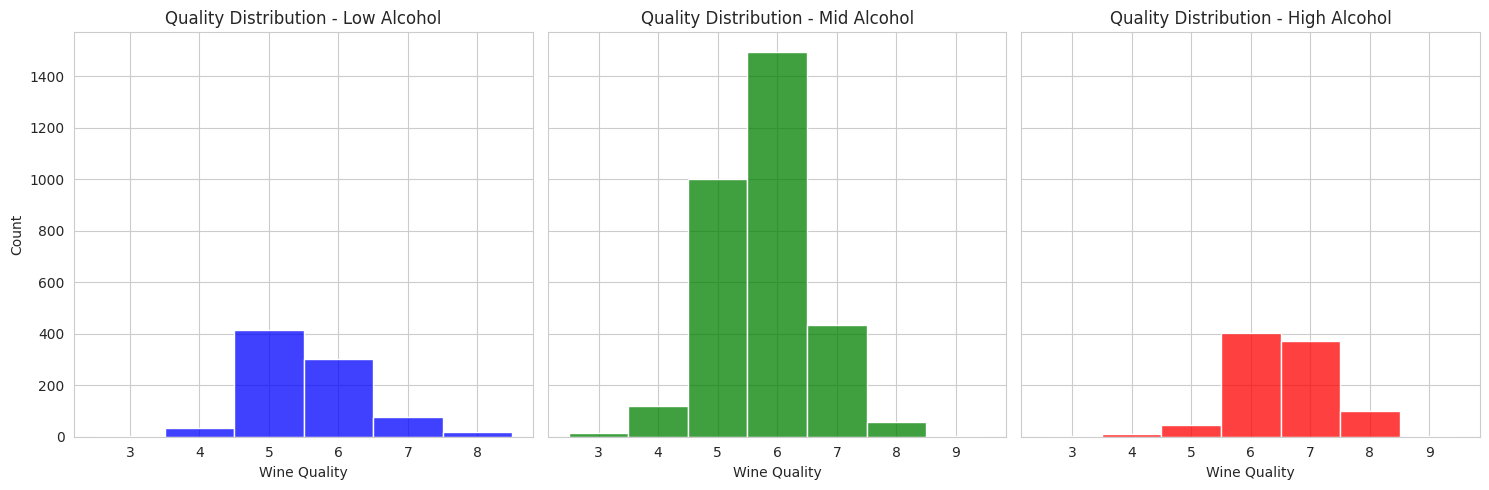

In [ ]:
sns.set_style("whitegrid")
fig, axes = plt.subplots(1, 3, figsize=(15, 5), sharey=True)

categories = ["low", "mid", "high"]
colors = ["blue", "green", "red"]

for i, cat in enumerate(categories):
    sns.histplot(white_wine[white_wine["alcohol_cat"] == cat]["quality"], bins=10, color=colors[i], ax=axes[i], discrete = True)
    axes[i].set_title(f"Quality Distribution - {cat.capitalize()} Alcohol")
    axes[i].set_xlabel("Wine Quality")
    axes[i].set_ylabel("Count")

plt.tight_layout()
plt.show()


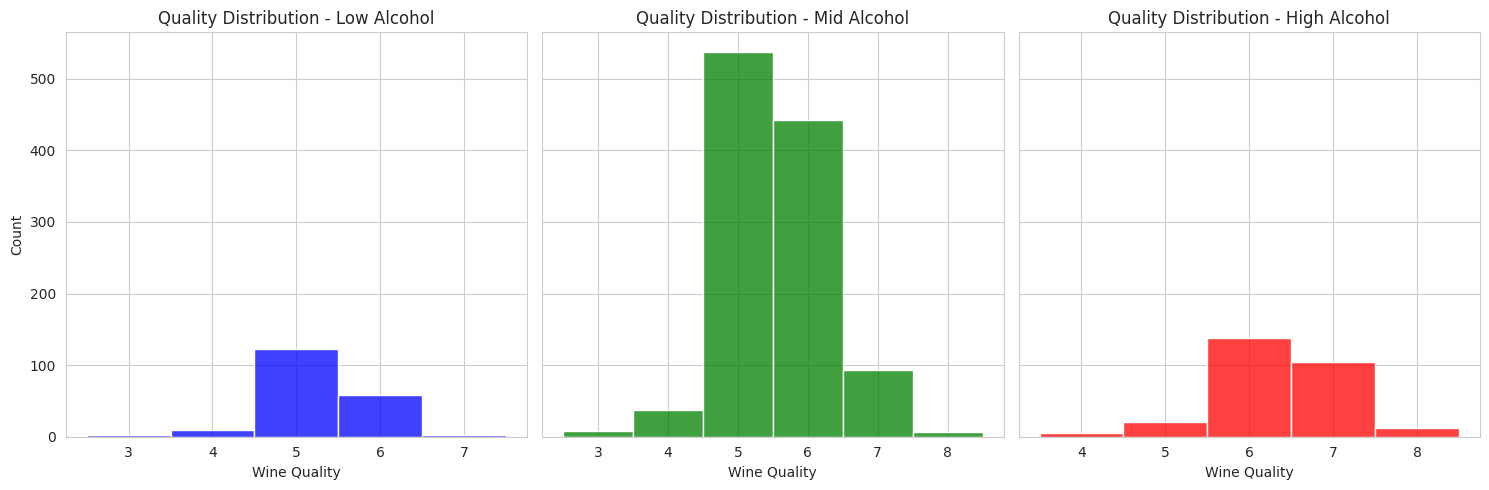

In [ ]:
sns.set_style("whitegrid")
fig, axes = plt.subplots(1, 3, figsize=(15, 5), sharey=True)
categories = ["low", "mid", "high"]
colors = ["blue", "green", "red"]
for i, cat in enumerate(categories):
    sns.histplot(red_wine[red_wine["alcohol_cat"] == cat]["quality"], bins=10, color=colors[i], ax=axes[i], discrete = True)
    axes[i].set_title(f"Quality Distribution - {cat.capitalize()} Alcohol")
    axes[i].set_xlabel("Wine Quality")
    axes[i].set_ylabel("Count")
plt.tight_layout()
plt.show()

D. Finding sugar category threshold

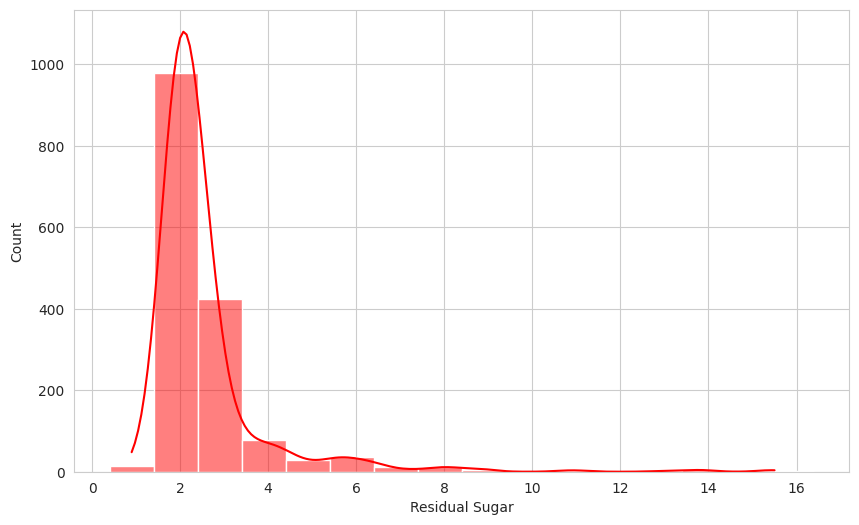

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(red_wine["residual sugar"], kde=True, color="red", discrete=True)
plt.xlabel("Residual Sugar")
plt.ylabel("Count")
plt.show()

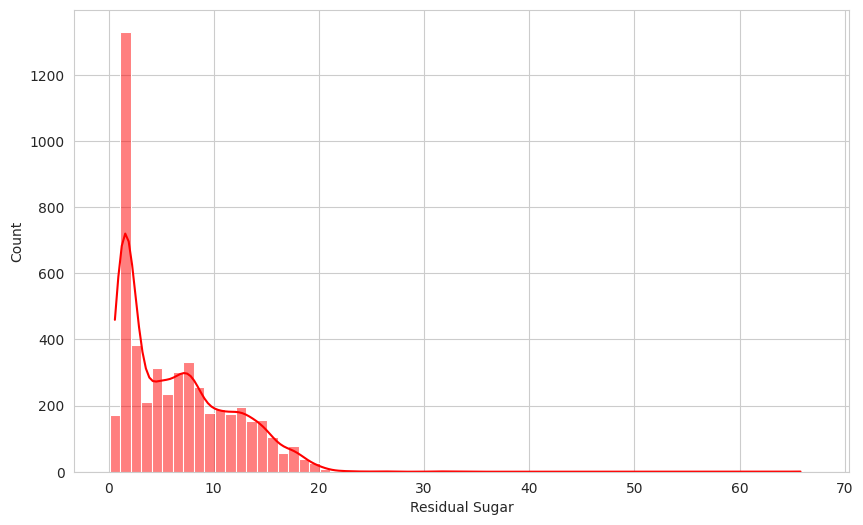

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(white_wine["residual sugar"], kde=True, color="red", discrete=True)
plt.xlabel("Residual Sugar")
plt.ylabel("Count")
plt.show()

categorising sugar content

In [ ]:
def categorize_sugar(df):
    threshold = 2
    df["isSweet"] = np.where(df["residual sugar"] < 5, 0, 1)

    return df
red_wine = categorize_sugar(red_wine)
white_wine = categorize_sugar(white_wine)

E. Plotting distribution of quality vs is sweet

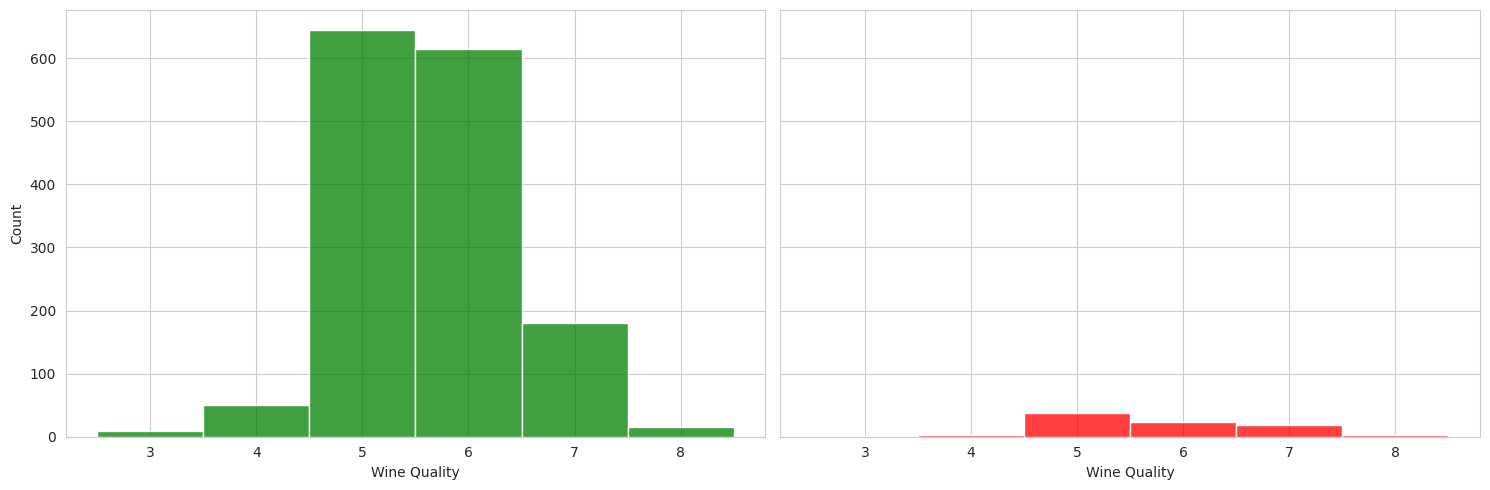

In [ ]:
sns.set_style("whitegrid")
fig, axes = plt.subplots(1, 2, figsize=(15, 5), sharey=True)
categories = [0, 1]
colors = ["green", "red"]
for i, cat in enumerate(categories):
    sns.histplot(red_wine[red_wine["isSweet"] == cat]["quality"], bins=10, color=colors[i], ax=axes[i], discrete = True)

    axes[i].set_xlabel("Wine Quality")
    axes[i].set_ylabel("Count")
plt.tight_layout()
plt.show()

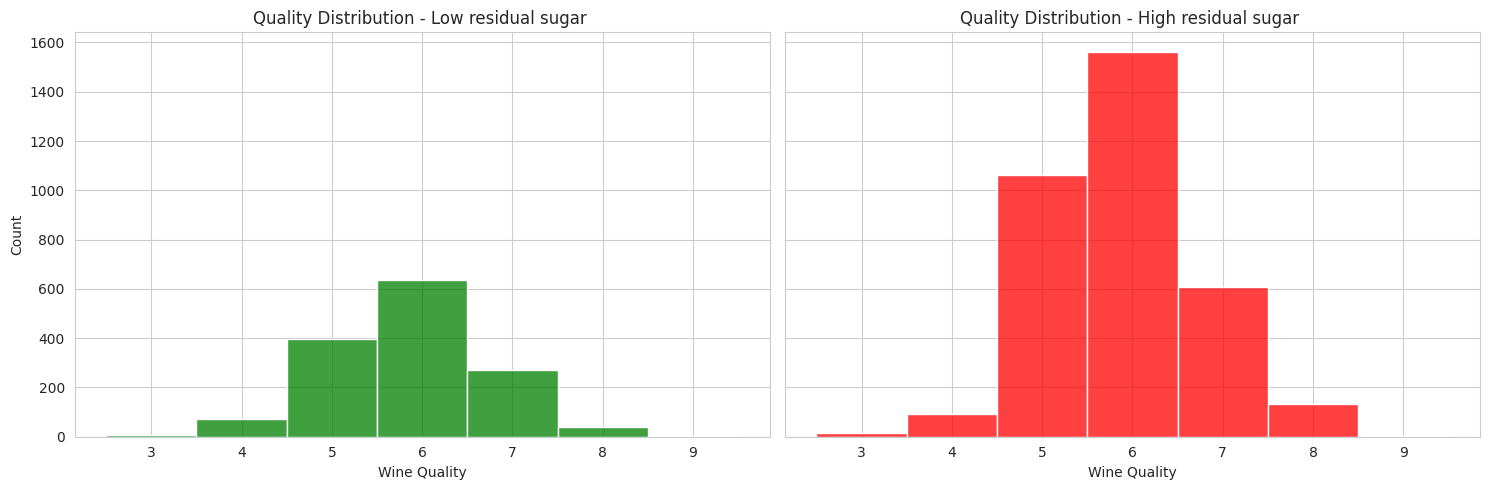

In [ ]:

sns.set_style("whitegrid")
fig, axes = plt.subplots(1, 2, figsize=(15, 5), sharey=True)
categories = ["low", "high"]
colors = ["green", "red"]
for i, cat in enumerate(categories):
    sns.histplot(white_wine[white_wine["sugar_cat"] == cat]["quality"], bins=10, color=colors[i], ax=axes[i], discrete = True)
    axes[i].set_title(f"Quality Distribution - {cat.capitalize()} residual sugar ")
    axes[i].set_xlabel("Wine Quality")
    axes[i].set_ylabel("Count")
plt.tight_layout()
plt.show()

Extension: Quality with respect to isSweet and alcohol_cat

In [7]:
plt.figure(figsize=(12, 6))

sns.boxplot(data=red_wine, x='alcohol_cat', y='quality', hue='isSweet',
            palette='Set1', hue_order=[1, 0])

plt.title('Distribution of Quality with Respect to isSweet and alcohol_cat')
plt.xlabel('Alcohol Category (low, medium, high)')
plt.ylabel('Quality')
plt.legend(title='isSweet', labels=['Sweet', 'Dry'])

plt.show()

ValueError: Could not interpret value `isSweet` for `hue`. An entry with this name does not appear in `data`.

<Figure size 1200x600 with 0 Axes>

# Determining subset of variables to use

Creating a correlation matrix to analyse correlations between each pair of variables.

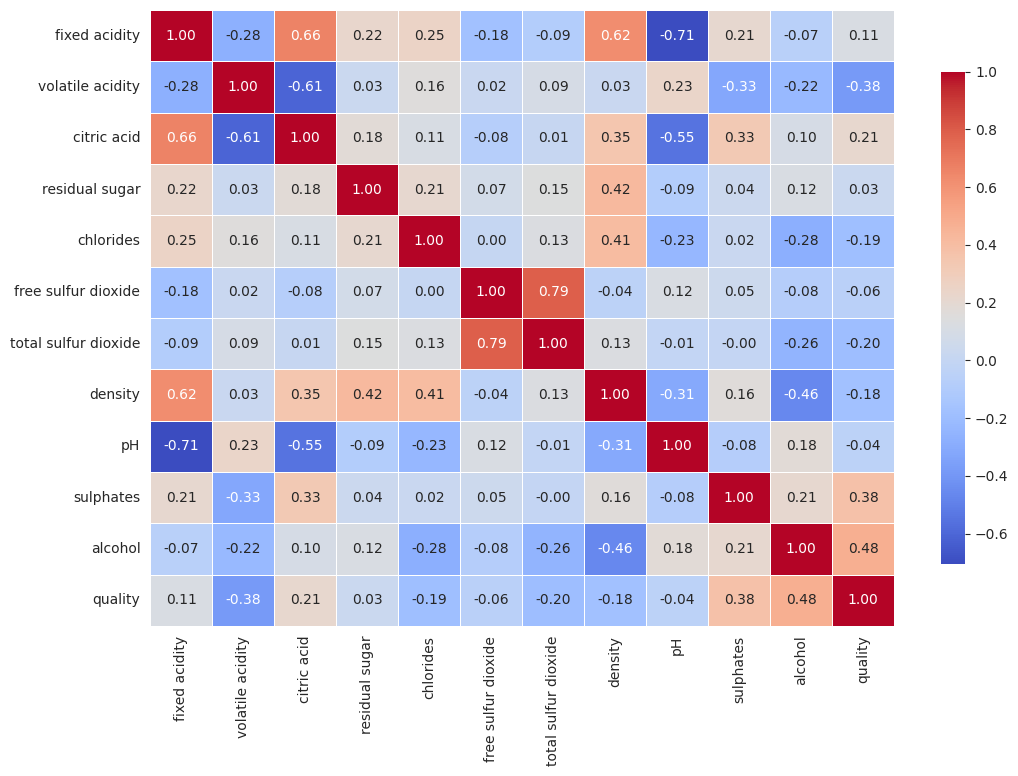

In [ ]:
correlation_matrix = red_wine.select_dtypes(include=np.number).corr(method='spearman')
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5, cbar_kws={'shrink': .8})
plt.show()

Analysing correlation between each variable and quality

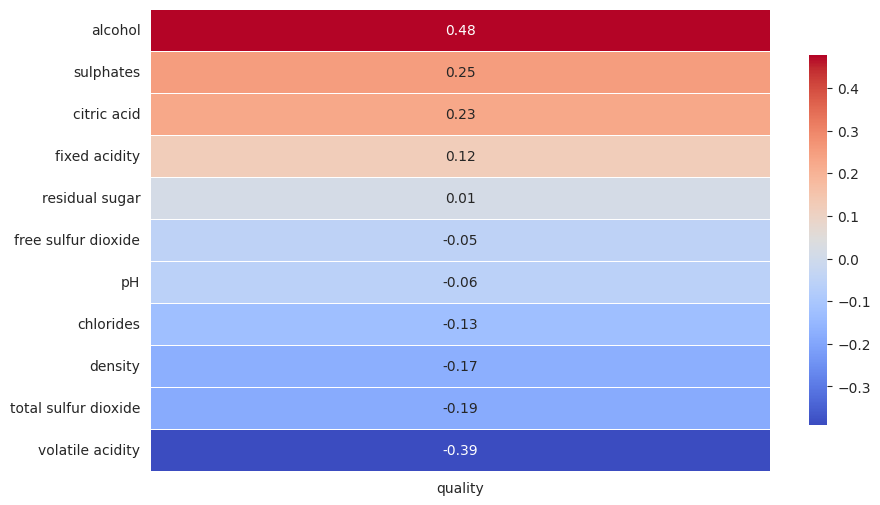

In [ ]:
correlation_with_quality = red_wine.select_dtypes(include=np.number).corr(method='pearson')['quality']
corr_with_quality = correlation_with_quality.drop('quality')
corr_with_quality = corr_with_quality.sort_values(ascending=False)
plt.figure(figsize=(10, 6))
sns.heatmap(corr_with_quality.to_frame(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5, cbar_kws={'shrink': .8})
plt.show()

Scatter plot matrix

# Classification model

In [6]:
def categorize_quality(df):
    df["quality_cat"] = np.where(df["quality"] < 6, 0, 1)

    return df
red_wine = categorize_quality(red_wine)

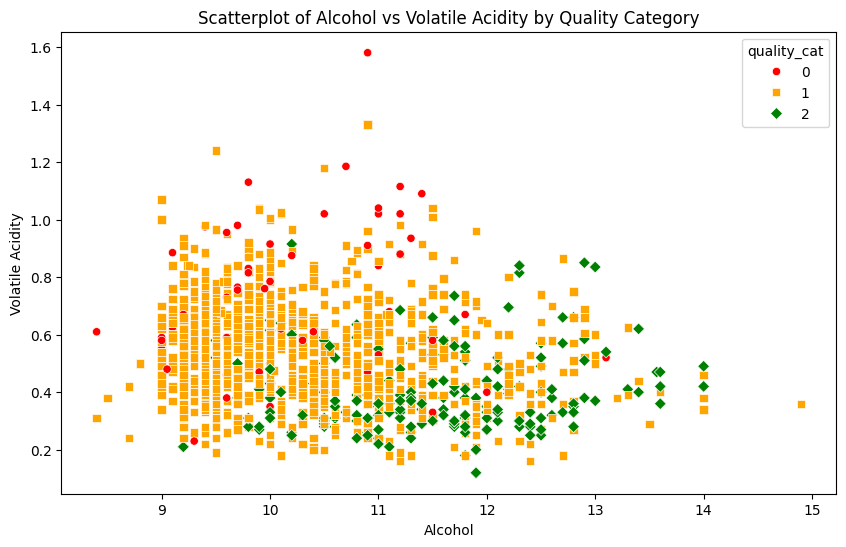

In [9]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=red_wine, x="alcohol", y="volatile acidity", hue="quality_cat", palette={0: 'red', 1: 'orange', 2: 'green'}, style="quality_cat", markers={0: 'o', 1: 's', 2: 'D'})

# Set labels and title
plt.title("Scatterplot of Alcohol vs Volatile Acidity by Quality Category")
plt.xlabel("Alcohol")
plt.ylabel("Volatile Acidity")

# Show the plot
plt.show()

In [7]:
from sklearn.model_selection import train_test_split
X = red_wine[["alcohol", "volatile acidity"]]
y = red_wine["quality_cat"]
data_train, data_test, labels_train,  labels_test = train_test_split(X, y, test_size=0.2, random_state=1)


In [8]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
# Delete everything below for student version except data_train_scaled, data_test_scaled =
scaler.fit(data_train)

data_train_scaled = scaler.transform(data_train)
data_test_scaled = scaler.transform(data_test)

In [9]:
def plot_line_of_best_fit(classifier, data, labels, title, logistic):

    data_min, data_max = data[:, 0].min(), data[:, 0].max()

    w = classifier.coef_[0]
    a = -w[0] / w[1]
    xx = np.linspace(data_min, data_max)
    yy = a * xx - (classifier.intercept_[0]) / w[1]

    fig = plt.figure(figsize=(20,6))
    fig.subplots_adjust(hspace=1, wspace=0.4)

    ax = fig.add_subplot(1, 2, 1)
    sns.scatterplot(x=data[:,0],y=data[:,1], hue=labels)
    ax.set_title(title)
    ax2 = ax.twinx()
    sns.regplot(x=xx,y=yy, ax=ax2, line_kws={"color": "red"}, scatter = False, logistic = logistic)

    print("w:", w)
    print("intercept:", classifier.intercept_)
    print("a (slope):", a)
    print("sample xx:", xx[:5])
    print("sample yy:", yy[:5])
    plt.show()
    plt.close()

In [10]:
from sklearn.linear_model import LogisticRegression
penalty = 'l2'
C = 1
solver = 'lbfgs'
multi_class = 'ovr'
logistic_regression = LogisticRegression(penalty=penalty,
                                          C=C,
                                          solver=solver,
                                          multi_class=multi_class)

logistic_regression.fit(data_train_scaled, labels_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


LogisticRegression(C=1, multi_class='ovr')

w: [ 1.05948292 -0.60348457]
intercept: [0.27583907]
a (slope): 1.7556089594802096
sample xx: [-1.88917763 -1.76654064 -1.64390364 -1.52126665 -1.39862966]
sample yy: [-2.85957992 -2.64427732 -2.42897471 -2.21367211 -1.99836951]


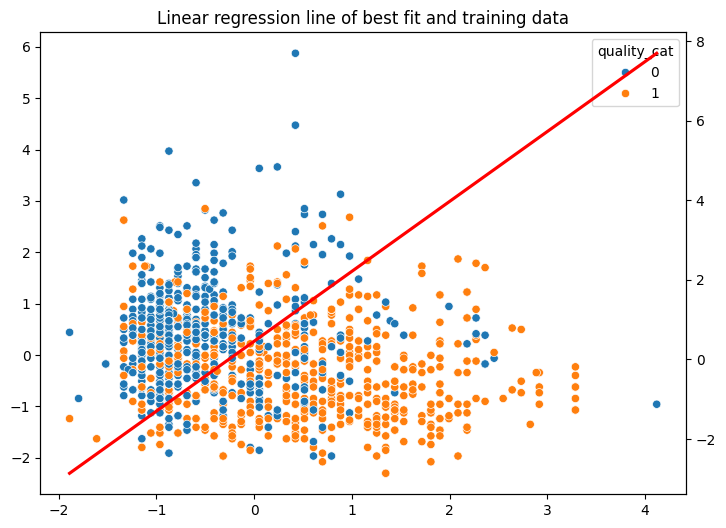

In [11]:
plot_line_of_best_fit(classifier = logistic_regression,
                      data = data_train_scaled,
                      labels = labels_train,
                      logistic = False,
                      title = "Linear regression line of best fit and training data")

/usr/local/lib/python3.11/dist-packages/statsmodels/genmod/families/links.py:198: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)
/usr/local/lib/python3.11/dist-packages/statsmodels/genmod/families/links.py:198: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)
/usr/local/lib/python3.11/dist-packages/statsmodels/genmod/families/links.py:198: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)
/usr/local/lib/python3.11/dist-packages/statsmodels/genmod/families/links.py:198: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)
/usr/local/lib/python3.11/dist-packages/statsmodels/genmod/families/links.py:198: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)
/usr/local/lib/python3.11/dist-packages/statsmodels/genmod/families/links.py:198: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)
/usr/local/lib/python3.11/dist-packages/statsmodels/genmod/families/links.py:198: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)

w: [ 1.05948292 -0.60348457]
intercept: [0.27583907]
a (slope): 1.7556089594802096
sample xx: [-1.88917763 -1.76654064 -1.64390364 -1.52126665 -1.39862966]
sample yy: [-2.85957992 -2.64427732 -2.42897471 -2.21367211 -1.99836951]


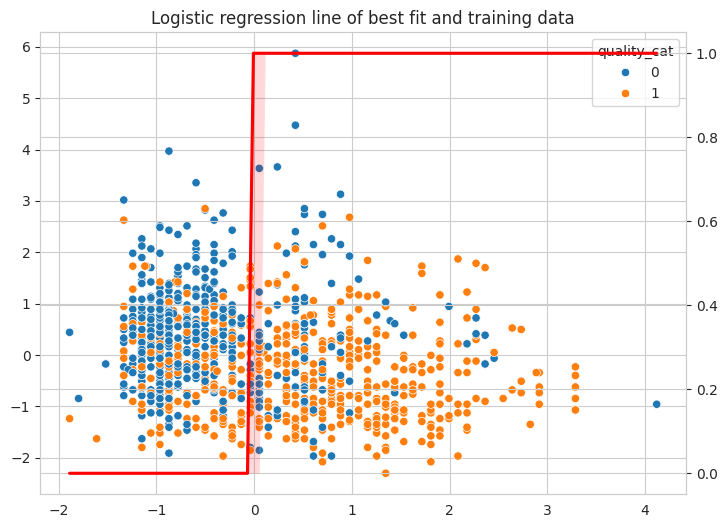

In [ ]:
plot_line_of_best_fit(classifier = logistic_regression,
                      data = data_train_scaled,
                      labels = labels_train,
                      logistic = True,
                      title = "Logistic regression line of best fit and training data")

In [12]:
logistic_regression_label_predictions = logistic_regression.predict(data_test_scaled)

In [15]:
from sklearn.metrics import accuracy_score
logistic_regression_label_predictions = logistic_regression.predict(data_train_scaled)
# Remove except test_acc =
train_acc = accuracy_score(labels_train, logistic_regression_label_predictions)

logistic_regression_label_predictions = logistic_regression.predict(data_test_scaled)
# Remove except test_acc =
test_acc = accuracy_score(labels_test, logistic_regression_label_predictions)
print(f"Logistic regression test accuracy: {train_acc * 100}%")
print(f"Logistic regression test accuracy: {test_acc * 100}%")

Logistic regression test accuracy: 73.26035965598123%
Logistic regression test accuracy: 76.5625%


In [ ]:
C = 1
kernel = 'poly'
random_state = 10
degree = 10
coef0 = 9

# Delete below except non_linear_svm =

from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

non_linear_svm = SVC(kernel = kernel, degree = degree, C = C, coef0 = coef0, random_state = 10)
non_linear_svm.fit(data_train_scaled, labels_train)
non_linear_svm_predictions = non_linear_svm.predict(data_test_scaled)

test_acc = accuracy_score(labels_test, non_linear_svm_predictions)

# Random Forest model

In [16]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(criterion='gini', n_estimators=200, random_state=20, n_jobs=20)

forest.fit(data_train_scaled, labels_train)

RandomForestClassifier(n_estimators=200, n_jobs=20, random_state=20)

In [17]:
from matplotlib.colors import ListedColormap

def plot_decision_regions(X, y, classifier, test_idx=None, resolution = 0.2):
  markers = ('x', 'o')
  colors = ('red', 'blue')
  cmap = ListedColormap(colors[:len(np.unique(y))])

  x1_min, x1_max = X[:,0].min() - 1, X[:, 0].max() + 1
  x2_min, x2_max = X[:,1].min() - 1, X[:, 1].max() + 1

  xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution), np.arange(x2_min, x2_max, resolution))

  Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
  Z = Z.reshape(xx1.shape)


  plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)


  for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1], alpha=0.8, c=colors[idx], marker=markers[idx], label=cl)


  if test_idx:
      X_test, y_test = X[test_idx, :], y[test_idx]
      plt.scatter(X_test[:, 0], X_test[:, 1], c='black', edgecolor='white', alpha=1.0, linewidth=1, marker='o', s=100, label='Test set')

  plt.xlabel('Feature 1')
  plt.ylabel('Feature 2')
  plt.title('Decision Boundary and Data Points')
  plt.legend(loc='upper left')
  plt.show()

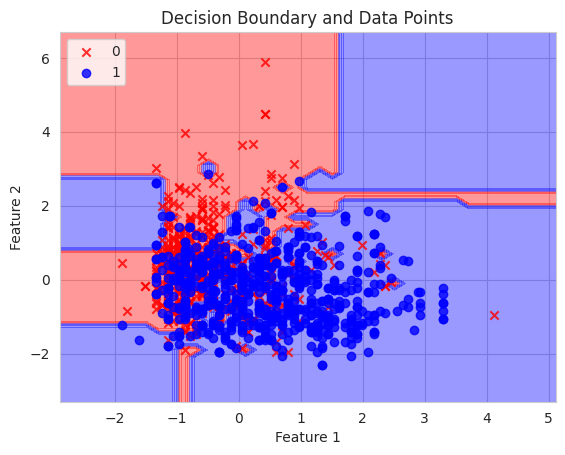

In [ ]:
plot_decision_regions(X=data_train_scaled, y=labels_train, classifier=forest, resolution=0.2)

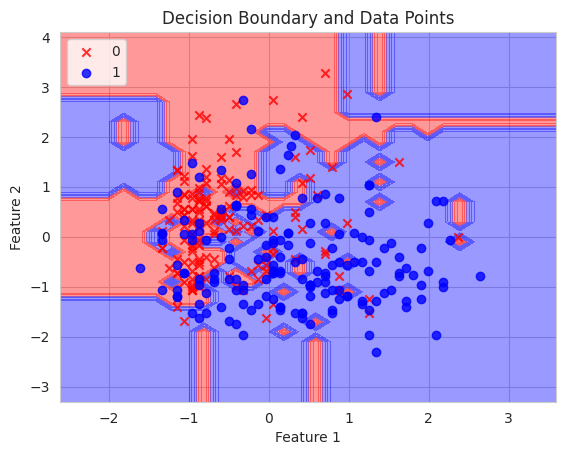

In [ ]:
plot_decision_regions(X=data_test_scaled, y=labels_test, classifier=forest, resolution=0.2)

In [18]:
from sklearn.metrics import accuracy_score

# 1. Predict the labels for your test set
forest_predictions = forest.predict(data_test_scaled)

# 2. Compare with true labels and calculate accuracy
forest_acc = accuracy_score(labels_test, forest_predictions)

decision_tree_predictions = forest.predict(data_train_scaled)
train_acc = accuracy_score(labels_train, decision_tree_predictions)

# 3. Print the accuracy
print(f"Random Forest test accuracy: {train_acc * 100:.2f}%")
print(f"Random Forest test accuracy: {forest_acc * 100:.2f}%")

Random Forest test accuracy: 92.89%
Random Forest test accuracy: 76.56%


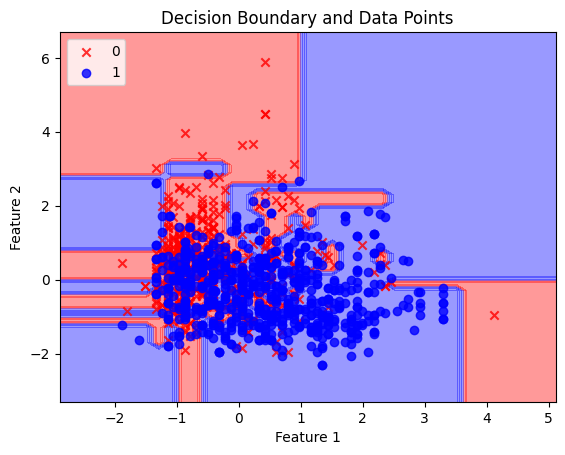

In [20]:
from sklearn import tree

decision_tree = tree.DecisionTreeClassifier(random_state = 200)
decision_tree.fit(data_train_scaled, labels_train)

plot_decision_regions(X=data_train_scaled, y=labels_train, classifier=decision_tree, resolution=0.2)


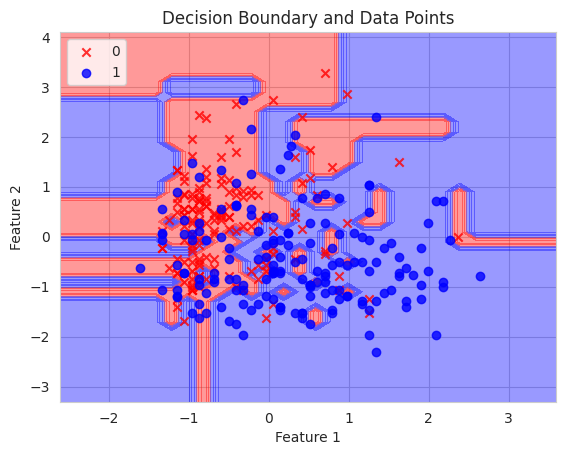

In [ ]:
plot_decision_regions(X=data_test_scaled, y=labels_test, classifier=decision_tree, resolution=0.2)

In [21]:


decision_tree_predictions = decision_tree.predict(data_train_scaled)
train_acc = accuracy_score(labels_train, decision_tree_predictions)

decision_tree_predictions = decision_tree.predict(data_test_scaled)
test_acc = accuracy_score(labels_test, decision_tree_predictions)

print(f"Train acc: {train_acc * 100}%")
print(f"Test acc: {test_acc * 100}%")

Train acc: 92.88506645817046%
Test acc: 74.0625%


# Improving forest model


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Increased hyperparameter search space
parameters_to_tune = [{'n_estimators': [10, 50, 100, 200],
                      'max_depth': [5, 10, 20, 50, 100],
                      'min_samples_split': [2, 5, 10],
                      'min_samples_leaf': [1, 2, 4]}]

search = GridSearchCV(RandomForestClassifier(random_state=10), parameters_to_tune, cv=5, n_jobs=-1)
search.fit(data_train_scaled, labels_train)

# Print the best hyperparameters
print(f"Best parameters set found: {search.best_params_}")

# Train the model with the best parameters
random_forest = RandomForestClassifier(n_estimators=search.best_params_['n_estimators'],
                                       max_depth=search.best_params_['max_depth'],
                                       min_samples_split=search.best_params_['min_samples_split'],
                                       min_samples_leaf=search.best_params_['min_samples_leaf'],
                                       random_state=10)

random_forest.fit(data_train_scaled, labels_train)

# Make predictions on train and test data
random_forest_predictions_train = random_forest.predict(data_train_scaled)
train_acc = accuracy_score(labels_train, random_forest_predictions_train)

random_forest_predictions_test = random_forest.predict(data_test_scaled)
test_acc = accuracy_score(labels_test, random_forest_predictions_test)

# Print accuracy
print(f"Train acc: {train_acc * 100}%")
print(f"Test acc: {test_acc * 100}%")